# <center> Word embeddings training </center> 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#download_data">Importing Needed packages, download_data and preprocess</a></li>
        <li><a href="#skipgram">Word2vec: skipgram</a></li>
        <li><a href="#CBOW">Word2vec: cbow</a></li>
        <li><a href="#FastText">fasttext</a></li>
        <li><a href="#similarity">Semantic similarity evaluation</a></li>
        <li><a href="#Visualization">Visualization of word embedding vectors</a></li>
    </ol>
</div>
<br>
<hr>


<h1 id='download_data'>1.Importing Needed packages, download_data and preprocess</h1>

Lets load required libraries

In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models.fasttext import FastText
import warnings
import string
import numpy as np
import os
from random import shuffle
import re
import urllib.request
import zipfile
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import pandas as pd
from IPython.display import display_html
warnings.filterwarnings("ignore")

## About the dataset

* **The QUAERO French Medical Corpus:**\
The QUAERO French Medical Corpus has been initially developed as a resource for named entity recognition and normalization <a href="http://www.lrec-conf.org/proceedings/lrec2014/workshops/LREC2014Workshop-BioTxtM2014%20Proceedings.pdf#page=33">[1]</a>. It was then improved with the purpose of creating a gold standard set of normalized entities for French biomedical text, that was used in the CLEF eHealth evaluation lab <a href="https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxjbGVmZWhlYWx0aDIwMTV8Z3g6NmJmNjQ0YWNlN2MwMTU2MA">[2]</a> <a href="http://ceur-ws.org/Vol-1609/16090028.pdf">[3]</a>.\
It is a complete corpus, tokenized and with one sentence per line.

* **The QUAERO French Press Corpus:**\
It is a complete corpus, tokenized and with one sentence per line.

## Download and Unzipping data 

In [2]:
#download the data
urllib.request.urlretrieve("https://perso.limsi.fr/neveol/TP_ISD2020.zip", filename="TP_ISD2020.zip")
with zipfile.ZipFile("TP_ISD2020.zip", 'r') as zip_ref:
    zip_ref.extractall("TP_ISD2020")

In [3]:
data1 = open('TP_ISD2020/QUAERO_FrenchMed/QUAERO_FrenchMed_traindev.ospl', encoding="utf8")
data2 = open('TP_ISD2020/QUAERO_FrenchPress/QUAERO_FrenchPress_traindev.ospl', encoding="utf8")

In [4]:
file_str1 = data1.read()
file_str2 = data2.read()

## Preprocess

In [5]:
def preprocess(str_val):
    str_val = re.sub("\r", " ", str_val)
    str_val = re.sub("\d+", " ", str_val)
    str_val = re.sub("\n", " ", str_val)
    str_val = re.sub("\uf0b7", "", str_val)

    for punc in string.punctuation +'’' :
        if punc != '.':
            str_val= str_val.replace(punc," ")
    sentences = str_val.split(".")
    
    filtered_sentences=[]
    for sentence in sentences:
        if len(sentence)>1:
            filtered_sentences.append(sentence.split())
    return filtered_sentences


In [6]:
filtered_sentences1=preprocess(file_str1)
filtered_sentences2=preprocess(file_str2)

In [7]:
print(filtered_sentences1[:1])

[['EMEA', 'H', 'C', 'PRIALT', 'Qu', 'est', 'ce', 'que', 'Prialt', 'Prialt', 'est', 'une', 'solution', 'pour', 'perfusion', 'contenant', 'le', 'principe', 'actif', 'ziconotide', 'à', 'des', 'concentrations', 'de', 'ou', 'microgrammes', 'par', 'millilitre']]


In [8]:
print(filtered_sentences2[:1])

[['Patricia', 'Martin', 'que', 'voici', 'que', 'voilà', 'oh', 'bonjour', 'Nicolas', 'Stoufflet']]


<h1 id="skipgram">2.Word2vec: skipgram</h1>

In [9]:
model_skipgram1 = Word2Vec(min_count=1,sg=1, size=100, window=10)
# sg=1 means skipgram, else CBOW
model_skipgram1.build_vocab(filtered_sentences1)  # The QUAERO French Medical Corpus
%time model_skipgram1.train(filtered_sentences1, total_examples=model_skipgram1.corpus_count, epochs=100)

CPU times: user 32 s, sys: 63.2 ms, total: 32.1 s
Wall time: 13.3 s


(3216890, 4168400)

In [10]:
model_skipgram2 = Word2Vec(min_count=1,sg=1, size=100, window=10)
# sg=1 means skipgram, else CBOW
model_skipgram2.build_vocab(filtered_sentences2) # The QUAERO French Press Corpus
%time model_skipgram2.train(filtered_sentences1, total_examples=model_skipgram2.corpus_count, epochs=100)

CPU times: user 30 s, sys: 87.9 ms, total: 30.1 s
Wall time: 11.5 s


(2200463, 4168400)

<h1 id="CBOW">3.Word2vec: CBOW</h1>

In [11]:
model_CBOW1 = Word2Vec(min_count=1,sg=0, workers=4, size=100, window=10) #sg=0 -> CBOW, sg here for skip-gram
model_CBOW1.build_vocab(filtered_sentences1) # The QUAERO French Medical Corpus
%time model_CBOW1.train(filtered_sentences1, total_examples=model_CBOW1.corpus_count, epochs=100)

CPU times: user 14.4 s, sys: 101 ms, total: 14.5 s
Wall time: 4.87 s


(3216117, 4168400)

In [12]:
model_CBOW2 = Word2Vec(min_count=1,sg=0, workers=4, size=100, window=10) #sg=0 -> CBOW, sg here for skip-gram
model_CBOW2.build_vocab(filtered_sentences2) # The QUAERO French Press Corpus
%time model_CBOW2.train(filtered_sentences2, total_examples=model_CBOW2.corpus_count, epochs=100)

CPU times: user 7min 49s, sys: 937 ms, total: 7min 50s
Wall time: 2min 1s


(81676530, 112056900)

<h1 id="FastText">4.FastText</h1>

In [13]:
embedding_size = 60
window_size = 40
min_word = 1
down_sampling = 1e-2
%time model_fastText1 = FastText(filtered_sentences1, size=embedding_size, window=window_size, min_count=min_word, sample=down_sampling,sg=0, iter=10)

CPU times: user 20.8 s, sys: 593 ms, total: 21.4 s
Wall time: 10.9 s


In [14]:
%time model_fastText2 = FastText(filtered_sentences2, size=embedding_size, window=window_size, min_count=min_word, sample=down_sampling,sg=0, iter=10)

CPU times: user 13min 59s, sys: 1.29 s, total: 14min 1s
Wall time: 4min 49s


In [15]:
# save only the word vectors
model_skipgram1.wv.save("skipgram_vector_Medical.bin")
model_skipgram2.wv.save("skipgram_vector_Press.bin")
model_CBOW1.wv.save("cbow_vector_Medical.bin")
model_CBOW2.wv.save("cbow_vector__Press.bin")
model_fastText1.wv.save("subword_vector_Medical.bin")
model_fastText2.wv.save("subword_vector__Press.bin")

<h1 id="similarity">5.Semantic similarity evaluation</h1>

In [51]:
def display_html_table(html_str):
    """Change the look and display style of table"""
    display_html(html_str.replace('table','table style="padding:20px;display:inline;color:navy;font-size:1.1em"'),raw=True)
def display_side_by_side(*args):
    html_str=' '
    
    for df in args:
        html_str+=df.to_html()    
    
    display_html_table(html_str)
 
def display_similar(positive:list,topn=10,data=1):
    """get similar concepts from 3 different models"""
    if data==1:
        topn_cbow=model_CBOW1.wv.most_similar(positive=w1, topn=topn)
        topn_skipgram=model_skipgram1.wv.most_similar(positive=w1, topn=topn)
        topn_fastText1=model_fastText1.wv.most_similar(positive=w1, topn=topn)
    else:
        topn_cbow=model_CBOW2.wv.most_similar(positive=w1, topn=topn)
        topn_skipgram=model_skipgram2.wv.most_similar(positive=w1, topn=topn)
        topn_fastText1=model_fastText2.wv.most_similar(positive=w1, topn=topn)
    
    display_side_by_side(
                     pd.DataFrame(topn_cbow,columns=['cbow','cosine_sim']),
                     pd.DataFrame(topn_skipgram,columns=['skipgram','cosine_sim']),
                     pd.DataFrame(topn_fastText1,columns=['fastText','cosine_sim']))

### Using the QUAERO French Medical Corpus

In [52]:
w1=['patient']
display_similar(w1,topn=10)

,cbow,cosine_sim
0,risque,0.695412
1,symptômes,0.605422
2,éviter,0.601819
3,carte,0.599345
4,LEMP,0.598055
5,qu,0.593997
6,avoir,0.589704
7,médicament,0.585351
8,signe,0.585004
9,donc,0.579724


In [53]:
w1=['traitement']
display_similar(w1,topn=10)

,cbow,cosine_sim
0,risque,0.635641
1,rapport,0.586497
2,patients,0.575386
3,pendant,0.553740
4,semaines,0.550677
5,SEP,0.545199
6,médecin,0.538581
7,contrôle,0.537119
8,maladie,0.534822
9,délai,0.534306


In [54]:
w1=['maladie']
display_similar(w1,topn=10)

,cbow,cosine_sim
0,Parkinson,0.788612
1,liée,0.650960
2,avancé,0.633127
3,infection,0.625664
4,affection,0.617914
5,Recklinghausen,0.608928
6,SIDA,0.604304
7,survenue,0.566109
8,qui,0.553658
9,neurophacomatose,0.552713


In [56]:
w1=['solution']
display_similar(w1,topn=1)

,cbow,cosine_sim
0,dissoudre,0.790528
,skipgram,cosine_sim
0,buvable,0.660912
,fastText,cosine_sim
0,Dissolution,0.993373


In [57]:
w1=['jaune']
display_similar(w1,topn=10)

,cbow,cosine_sim
0,pâle,0.910016
1,flavicollis,0.838099
2,Fabr,0.835394
3,Calotermes,0.821265
4,dioxyde,0.818143
5,Talc,0.814534
6,Ethylcellulose,0.803926
7,éthylcellulose,0.800130
8,fer,0.799840
9,Méthylhydroxypropylcellulose,0.796315


### Using the QUAERO French Press Corpus

In [58]:
w1=['patient']
display_similar(w1,topn=10, data=2)

,cbow,cosine_sim
0,équipé,0.429447
1,contaminé,0.423183
2,panneau,0.418939
3,foyer,0.400263
4,palliatifs,0.393399
5,cancéreux,0.392417
6,chirurgie,0.382860
7,hospitalisé,0.381749
8,peluche,0.379551
9,double,0.370263


In [59]:
w1=['traitement']
display_similar(w1,topn=10, data=2)

,cbow,cosine_sim
0,collectif,0.485459
1,système,0.477075
2,sida,0.474970
3,générateurs,0.462132
4,viol,0.434256
5,fonctionnement,0.425253
6,fondement,0.422760
7,gériatrie,0.419574
8,survivant,0.414400
9,couverture,0.411820


In [60]:
w1=['maladie']
display_similar(w1,topn=10, data=2)

,cbow,cosine_sim
0,épidémie,0.525049
1,pneumopathie,0.520447
2,SIDA,0.505163
3,atypique,0.473817
4,proportion,0.451687
5,virus,0.447277
6,pneumonie,0.443140
7,miroiter,0.439345
8,grippe,0.439293
9,maladies,0.427537


In [61]:
w1=['solution']
display_similar(w1,topn=10, data=2)

,cbow,cosine_sim
0,définition,0.512236
1,pacifique,0.510870
2,consensuelle,0.501270
3,mesure,0.450520
4,décrispation,0.450016
5,unité,0.444101
6,structure,0.442434
7,règle,0.415022
8,personne,0.410572
9,entente,0.405572


In [62]:
w1=['jaune']
display_similar(w1,topn=10, data=2)

,cbow,cosine_sim
0,maillot,0.787785
1,Pena,0.641003
2,Baden,0.628184
3,Saâdoune,0.619320
4,Bradley,0.618020
5,Armstrong,0.600443
6,Lance,0.589145
7,McGee,0.568337
8,emparé,0.562755
9,décaleront,0.558092


<h1 id="Visualization">7.Visualization of word embedding vectors</h1>

### skipgram

In [63]:
keys = ['patient', 'traitement', 'maladie', 'solution', 'jaune']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_skipgram1.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model_skipgram1[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [64]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

<IPython.core.display.Javascript object>


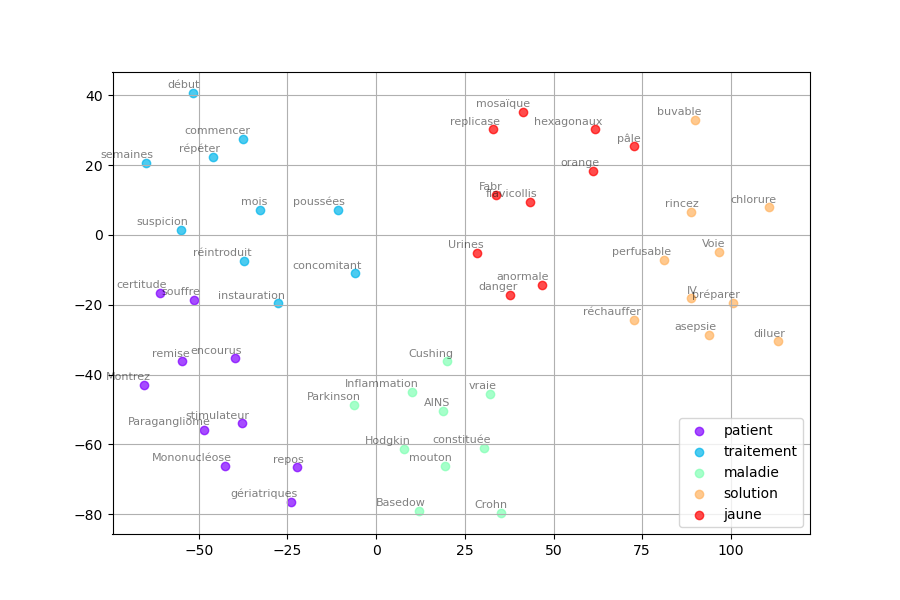

In [65]:
# sourse https://habr.com/en/company/mailru/blog/449984/
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(9, 6))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color.reshape(1,-1), alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("i.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()
tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)


### CBOW

In [66]:
embedding_clusters1 = []
word_clusters1 = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_CBOW1.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model_CBOW1[similar_word])
    embedding_clusters1.append(embeddings)
    word_clusters1.append(words)

In [67]:
embedding_clusters1 = np.array(embedding_clusters1)
n, m, k = embedding_clusters1.shape
embeddings_en_2d1 = np.array(tsne_model_en_2d.fit_transform(embedding_clusters1.reshape(n * m, k))).reshape(n, m, 2)

<IPython.core.display.Javascript object>


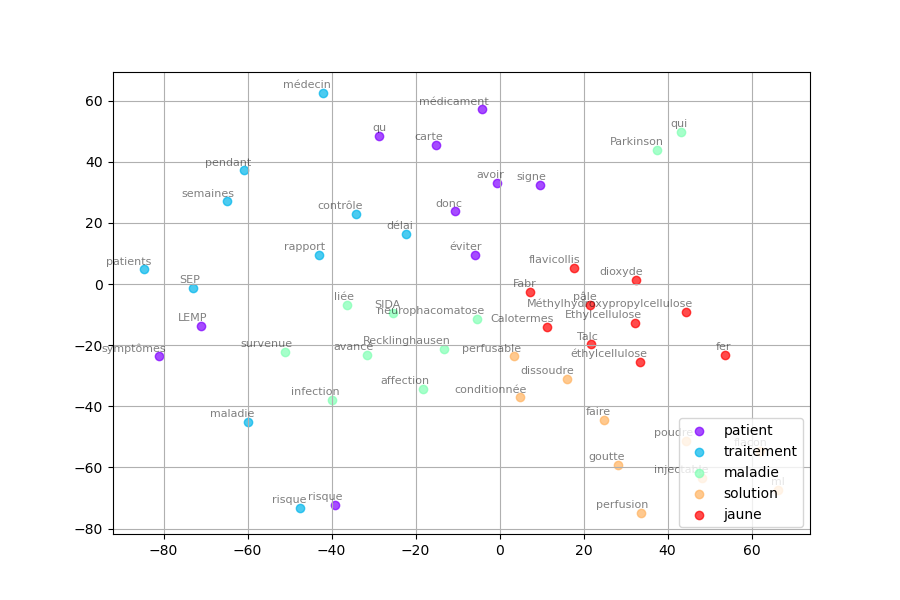

In [68]:
tsne_plot_similar_words(keys, embeddings_en_2d1, word_clusters1)

### FastText

<IPython.core.display.Javascript object>


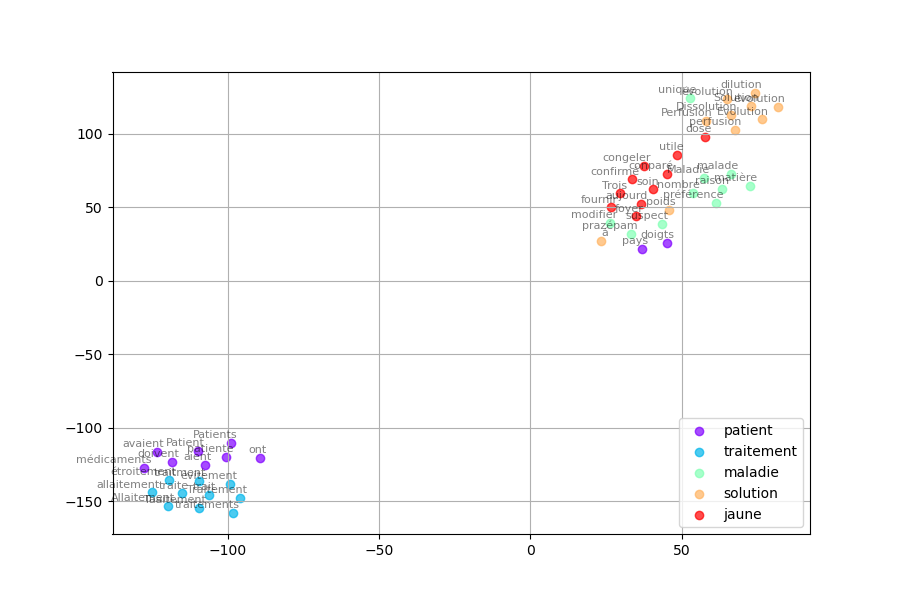

In [69]:
embedding_clusters1 = []
word_clusters1 = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_fastText1.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model_fastText1[similar_word])
    embedding_clusters1.append(embeddings)
    word_clusters1.append(words)
embedding_clusters1 = np.array(embedding_clusters1)
n, m, k = embedding_clusters1.shape
embeddings_en_2d1 = np.array(tsne_model_en_2d.fit_transform(embedding_clusters1.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(keys, embeddings_en_2d1, word_clusters1)